In [635]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import datetime as dt

Cargo los csv con los features

In [656]:
aut1= pd.read_csv( 'data/features1_aut1.csv')
aut2= pd.read_csv( 'data/features1_aut2.csv')
aut3= pd.read_csv( 'data/features1_aut3.csv')
aut4= pd.read_csv( 'data/features1_aut4.csv')
aut5= pd.read_csv( 'data/features1_aut5.csv')
aut6= pd.read_csv( 'data/features1_aut6.csv')
target_aut= pd.read_csv( 'data/features1_target.csv')

In [614]:
target_aut.head()

,ref_hash,auctions_count,dia_semana_mean,hora_mean,cantidad de eventos,st
0,1000169251625791246,13.0,4.538462,11.923077,2.0,0
1,1000395625957344683,15.0,3.533333,15.733333,0.0,0
2,1003027494996471685,168.0,3.220238,8.952381,9.0,0
3,1006670001679961544,3.0,4.333333,19.000000,0.0,0
4,1007573308966476713,7.0,3.571429,15.857143,0.0,0


In [615]:
target_aut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4037 entries, 0 to 4036
Data columns (total 6 columns):
ref_hash               4037 non-null int64
auctions_count         4037 non-null float64
dia_semana_mean        4037 non-null float64
hora_mean              4037 non-null float64
cantidad de eventos    4037 non-null float64
st                     4037 non-null int64
dtypes: float64(4), int64(2)
memory usage: 189.3 KB


In [6]:
aut3.head()

,ref_hash,auctions_count,dia_semana_mean,hora_mean,cantidad de eventos,st
0,1000169251625791246,5.0,5.200000,8.600000,29.0,26346.707184
1,1000395625957344683,3.0,3.000000,8.000000,2.0,24334.885605
2,1003027494996471685,3.0,6.666667,21.333333,27.0,73885.671334
3,1006670001679961544,0.0,0.000000,0.000000,3.0,259200.000000
4,1007573308966476713,3.0,4.333333,17.333333,3.0,168200.072256


In [683]:
inst1= pd.read_csv( 'data/features1_inst1.csv')
inst2= pd.read_csv( 'data/features1_inst2.csv')
inst3= pd.read_csv( 'data/features1_inst3.csv')
inst4= pd.read_csv( 'data/features1_inst4.csv')
inst5= pd.read_csv( 'data/features1_inst5.csv')
inst6= pd.read_csv( 'data/features1_inst6.csv')
target_inst= pd.read_csv( 'data/features1_target_installs.csv')

In [11]:
target_inst.head(5)

,ref_hash,installs_count,dia_semana_mean,hora_mean,cantidad de eventos,sc
0,1000169251625791246,0.0,0.0,0.0,2.0,0
1,1000395625957344683,0.0,0.0,0.0,0.0,0
2,1003027494996471685,0.0,0.0,0.0,9.0,0
3,1006670001679961544,0.0,0.0,0.0,0.0,0
4,1007573308966476713,0.0,0.0,0.0,0.0,0


# Pruebo algunos features 

In [359]:
st=aut2[['ref_hash', 'st']]
st.columns=['ref_hash','timeToAuction_min']
st.head()

,ref_hash,timeToAuction_min
0,1000169251625791246,11275.349980
1,1000395625957344683,110734.885605
2,1003027494996471685,75911.481120
3,1006670001679961544,259200.000000
4,1007573308966476713,18137.251334


In [361]:
prueba=aut1.merge(st, on='ref_hash', how='left')
prueba['timeToAuction_min'] = prueba['timeToAuction_min'].fillna(72 * 60 * 60)
prueba.head()

,ref_hash,auctions_count,dia_semana_mean,hora_mean,cantidad de eventos,st,timeToAuction_min
0,1000169251625791246,10.0,5.300000,6.100000,17.0,10509.519448,11275.349980
1,1000395625957344683,18.0,4.833333,8.222222,2.0,21512.080498,110734.885605
2,1003027494996471685,1.0,6.000000,22.000000,1.0,162311.481120,75911.481120
3,1006670001679961544,0.0,0.000000,0.000000,0.0,259200.000000,259200.000000
4,1007573308966476713,2.0,6.000000,14.500000,4.0,104537.251334,18137.251334


In [371]:
evts = pd.read_csv("data/events_ventana1.csv", dtype = {"event_id": np.int16, "application_id": np.int16, 'device_countrycode': 'category', 'device_os_version': 'category', 'device_brand': 'category', 'device_model': 'category', 'device_city': 'category', 'session_user_agent': 'category', 'trans_id': 'category', 'user_agent': 'category', 'carrier' : 'category', 'kind': 'category', 'device_os': 'category', 'connection_type': 'category', 'ip_address': 'category', 'device_language': 'category'})

In [372]:
evts.head()

,index,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2130678,2019-04-20 01:42:49.120,0,1891515180541284343,5857744372586891366,210,False,6287817205707153877,NaN,NaN,...,NaN,5.046185273150854e+18,5b506964-5f47-4b28-a8c2-8a92d6c23379,NaN,5.882882097123621e+18,NaN,False,NaN,7544543351571901618,3.3013777759777e+18
1,2130680,2019-04-20 01:42:49.340,1,1891515180541284343,7642521036780133571,210,False,6287817205707153877,NaN,NaN,...,NaN,NaN,f1fb9d15-1a7b-4116-8d3b-c4c403e197e2,NaN,4.017674184041173e+18,NaN,False,NaN,6949523255335024165,NaN
2,2130681,2019-04-20 01:42:49.365,1,1891515180541284343,2548841562898283198,210,False,6287817205707153877,NaN,NaN,...,NaN,NaN,c85a0b15-a5d7-472e-8116-6bfa3db19687,NaN,4.017674184041173e+18,NaN,False,NaN,6428537280982666957,NaN
3,2130684,2019-04-20 01:42:51.438,2,1891515180541284343,609402887625919085,210,False,6287817205707153877,NaN,NaN,...,NaN,NaN,f4aa0a97-2de6-4f22-95c6-1b3150112cb9,NaN,6.168308581888313e+18,NaN,False,NaN,7607371352198017145,NaN
4,2130688,2019-04-20 01:42:51.838,1,1891515180541284343,9114651763556439823,210,False,6287817205707153877,NaN,NaN,...,NaN,NaN,08e2f7f7-875f-4aa0-b337-b9b87b0d83ea,NaN,4.017674184041173e+18,NaN,False,NaN,2901772839007473756,NaN


In [376]:
apps_populares = evts[['application_id', 'ref_hash']].groupby('application_id').count().reset_index()
apps_populares.columns = ['application_id', 'popularidad_app']
apps_populares.head()

,application_id,popularidad_app
0,1,21
1,2,153
2,3,699
3,5,36
4,6,19


In [377]:
apps_populares = evts[['ref_hash', 'application_id']].merge(apps_populares, on = 'application_id')
apps_populares.head()

,ref_hash,application_id,popularidad_app
0,5857744372586891366,210,574130
1,7642521036780133571,210,574130
2,2548841562898283198,210,574130
3,609402887625919085,210,574130
4,9114651763556439823,210,574130


In [378]:
pop=apps_populares.groupby('ref_hash')['popularidad_app'].mean().reset_index()
pop.columns=['ref_hash', 'pop_media_apps']
pop.head()

,ref_hash,pop_media_apps
0,41863526108385,477288.295455
1,161514654074162,196761.000000
2,186034136943920,574130.000000
3,360710529886978,36346.000000
4,365882020742330,43009.000000


In [379]:
prueba=prueba.merge(pop, on='ref_hash', how='left')
prueba['pop_media_apps'] = prueba['pop_media_apps'].fillna(0)
prueba.head()

,ref_hash,auctions_count,dia_semana_mean,hora_mean,cantidad de eventos,st,timeToAuction_min,pop_media_apps
0,1000169251625791246,10.0,5.300000,6.100000,17.0,10509.519448,11275.349980,85646.0
1,1000395625957344683,18.0,4.833333,8.222222,2.0,21512.080498,110734.885605,196761.0
2,1003027494996471685,1.0,6.000000,22.000000,1.0,162311.481120,75911.481120,53782.0
3,1006670001679961544,0.0,0.000000,0.000000,0.0,259200.000000,259200.000000,0.0
4,1007573308966476713,2.0,6.000000,14.500000,4.0,104537.251334,18137.251334,12546.0


In [386]:
evts.columns

Index(['index', 'date', 'event_id', 'ref_type', 'ref_hash', 'application_id',
       'attributed', 'device_countrycode', 'device_os_version', 'device_brand',
       'device_model', 'device_city', 'session_user_agent', 'trans_id',
       'user_agent', 'event_uuid', 'carrier', 'kind', 'device_os', 'wifi',
       'connection_type', 'ip_address', 'device_language'],
      dtype='object')

In [395]:
installs= pd.read_csv("data/installs.csv.gzip", compression='gzip')
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-04-24 06:23:29.495,1,1494519392962156891,4716708407362582887,NaN,False,True,6287817205707153877,NaN,3.739127e+17,adjust.com,NaN,79837499-2f2a-4605-a663-e322f759424f,app_open,NaN,NaN,4243443387795468703,3.301378e+18
1,2019-04-24 02:06:01.032,1,1494519392962156891,7143568733100935872,NaN,False,False,6287817205707153877,NaN,7.805539e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,4724288679627032761,3.301378e+18
2,2019-04-20 10:15:36.274,1,1494519392962156891,5230323462636548010,NaN,False,True,6287817205707153877,NaN,8.355496e+18,adjust.com,NaN,dda99e3c-9c4b-487d-891c-79f0a02cb4a8,app_open,NaN,NaN,8291809486355890410,4.060930e+18
3,2019-04-20 21:56:47.151,1,1494519392962156891,5097163995161606833,NaN,False,True,6287817205707153877,NaN,2.355772e+18,adjust.com,NaN,7010c3ce-0fcf-46c6-9be8-374cc0e20af4,app_open,NaN,NaN,4006811922873399949,3.301378e+18
4,2019-04-20 22:40:41.239,1,1494519392962156891,6328027616411983332,NaN,False,False,6287817205707153877,NaN,6.156971e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,3386455054590810771,3.301378e+18


In [474]:
dalvik = installs[installs['user_agent'].str.contains(r"\Dalvik\b", case=False, na=False, regex=True)].reset_index()
dalvik.head(1)

,index,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,1514,2019-04-18 01:53:11.534,7,1891515180541284343,5935409935371325543,NaN,False,True,6287817205707153877,2.208835e+18,2.095801e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 8.1.0; Moto G ...,28e70d7a-39fd-4a74-ae06-fa4ef9067716,Open,True,NaN,8206492104262932286,6.584214e+18


In [421]:
dalvik .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255175 entries, 0 to 255174
Data columns (total 19 columns):
index                 255175 non-null int64
created               255175 non-null object
application_id        255175 non-null int64
ref_type              255175 non-null int64
ref_hash              255175 non-null int64
click_hash            863 non-null object
attributed            255175 non-null bool
implicit              255175 non-null bool
device_countrycode    255175 non-null int64
device_brand          239275 non-null float64
device_model          254937 non-null float64
session_user_agent    255175 non-null object
user_agent            255175 non-null object
event_uuid            55368 non-null object
kind                  55368 non-null object
wifi                  239276 non-null object
trans_id              3 non-null object
ip_address            255175 non-null int64
device_language       255175 non-null float64
dtypes: bool(2), float64(3), int64(6), object(8)
me

In [422]:
#dalvik = dalvik.dropna()
dalvik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255175 entries, 0 to 255174
Data columns (total 19 columns):
index                 255175 non-null int64
created               255175 non-null object
application_id        255175 non-null int64
ref_type              255175 non-null int64
ref_hash              255175 non-null int64
click_hash            863 non-null object
attributed            255175 non-null bool
implicit              255175 non-null bool
device_countrycode    255175 non-null int64
device_brand          239275 non-null float64
device_model          254937 non-null float64
session_user_agent    255175 non-null object
user_agent            255175 non-null object
event_uuid            55368 non-null object
kind                  55368 non-null object
wifi                  239276 non-null object
trans_id              3 non-null object
ip_address            255175 non-null int64
device_language       255175 non-null float64
dtypes: bool(2), float64(3), int64(6), object(8)
me

In [424]:
def parser2(values):
    dispositivo = []
    x=values.str.split(';')
    x=x.str.get(3)
    x=x.str.split('Build')
   

   
    z=x.str.get(0)
    z=z.str.split('MIUI')
    
    return z.str.get(0)

In [425]:
dispositivos2=parser2(dalvik.user_agent)
d_dalvik2=pd.DataFrame(dispositivos2)
d_dalvik2.head(10)

,user_agent
0,Moto G (5S) Plus
1,Redmi Note 5
2,Redmi Note 5
3,LT5216
4,Z835
5,LG-M320
6,SM-J400M
7,Ilium M7
8,SM-G530H
9,moto e5 play


In [427]:
d_dalvik2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255175 entries, 0 to 255174
Data columns (total 1 columns):
user_agent    255169 non-null object
dtypes: object(1)
memory usage: 1.9+ MB


In [428]:
d_dalvik2['ref_hash']=dalvik['ref_hash']
d_dalvik2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255175 entries, 0 to 255174
Data columns (total 2 columns):
user_agent    255169 non-null object
ref_hash      255175 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.9+ MB


In [429]:
d_dalvik2.head()

,user_agent,ref_hash
0,Moto G (5S) Plus,5935409935371325543
1,Redmi Note 5,7322471555202088203
2,Redmi Note 5,7322471555202088203
3,LT5216,3587734752131001332
4,Z835,277671479478293909


In [436]:
grupo=d_dalvik2.groupby(['user_agent'])['user_agent'].count().sort_values(ascending=False).rename("Total").reset_index()
suma=grupo['Total'].sum()
grupo['%Modelo']=grupo['Total']/suma *100
grupo.head()

,user_agent,Total,%Modelo
0,SM-G532M,9756,3.823348
1,moto g(6) play,6050,2.370978
2,ANE-LX3,5789,2.268693
3,Moto E (4),4492,1.760402
4,SNE-LX3,4212,1.650671


In [438]:
merged_model=d_dalvik2.merge(grupo[['user_agent','%Modelo']],on='user_agent')
merged_model.head()

,user_agent,ref_hash,%Modelo
0,Moto G (5S) Plus,5935409935371325543,0.080731
1,Moto G (5S) Plus,654355544285026705,0.080731
2,Moto G (5S) Plus,3812493979217960770,0.080731
3,Moto G (5S) Plus,6187127045207955752,0.080731
4,Moto G (5S) Plus,6594933933642936379,0.080731


In [443]:
merged_model.info()
merged_model['%Modelo'].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255169 entries, 0 to 255168
Data columns (total 3 columns):
user_agent    255169 non-null object
ref_hash      255169 non-null int64
%Modelo       255169 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.8+ MB


count    255169.000000
mean          0.752151
std           0.882685
min           0.000392
25%           0.108947
50%           0.444803
75%           1.080460
max           3.823348
Name: %Modelo, dtype: float64

In [440]:
prueba=prueba.merge(merged_model[['ref_hash','%Modelo']], on='ref_hash', how='left')



,ref_hash,auctions_count,dia_semana_mean,hora_mean,cantidad de eventos,st,timeToAuction_min,pop_media_apps,%Modelo
0,1000169251625791246,10.0,5.300000,6.100000,17.0,10509.519448,11275.349980,85646.0,NaN
1,1000395625957344683,18.0,4.833333,8.222222,2.0,21512.080498,110734.885605,196761.0,0.591765
2,1000395625957344683,18.0,4.833333,8.222222,2.0,21512.080498,110734.885605,196761.0,0.591765
3,1003027494996471685,1.0,6.000000,22.000000,1.0,162311.481120,75911.481120,53782.0,NaN
4,1006670001679961544,0.0,0.000000,0.000000,0.0,259200.000000,259200.000000,0.0,NaN


In [445]:
prueba=prueba.merge(merged_model[['ref_hash','%Modelo']], on='ref_hash', how='left')
prueba['%Modelo'] = prueba['%Modelo'].fillna(0.75)
prueba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80351 entries, 0 to 80350
Data columns (total 9 columns):
ref_hash               80351 non-null int64
auctions_count         80351 non-null float64
dia_semana_mean        80351 non-null float64
hora_mean              80351 non-null float64
cantidad de eventos    80351 non-null float64
st                     80351 non-null float64
timeToAuction_min      80351 non-null float64
pop_media_apps         80351 non-null float64
%Modelo                80351 non-null float64
dtypes: float64(8), int64(1)
memory usage: 6.1 MB


# agrego los nuevos features a todos

In [482]:
st1=aut1[['ref_hash', 'st']]
st1.columns=['ref_hash','timeToAuction_min']
aut2=aut2.merge(st1, on='ref_hash', how='left')
aut2.head()

,ref_hash,auctions_count,dia_semana_mean,hora_mean,cantidad de eventos,st,timeToAuction_min
0,1000169251625791246,11.0,5.454545,6.272727,29.0,11275.349980,10509.519448
1,1000395625957344683,16.0,5.125000,6.125000,2.0,110734.885605,21512.080498
2,1003027494996471685,3.0,6.666667,21.333333,16.0,75911.481120,162311.481120
3,1006670001679961544,0.0,0.000000,0.000000,2.0,259200.000000,259200.000000
4,1007573308966476713,2.0,6.000000,14.500000,1.0,18137.251334,104537.251334


In [658]:
# usa solo las ventanas 2,3,4,5,6
st1=aut1[['ref_hash', 'st']]
st1.columns=['ref_hash','timeToAuction_min']
aut2=aut2.merge(st1, on='ref_hash', how='left')
aut2['timeToAuction_min'] = aut2['timeToAuction_min'].fillna(72 * 60 * 60)

st2=aut2[['ref_hash', 'st']]
st2.columns=['ref_hash','timeToAuction_min']
aut3=aut3.merge(st2, on='ref_hash', how='left')
aut3['timeToAuction_min'] = aut3['timeToAuction_min'].fillna(72 * 60 * 60)

st3=aut3[['ref_hash', 'st']]
st3.columns=['ref_hash','timeToAuction_min']
aut4=aut4.merge(st3, on='ref_hash', how='left')
aut4['timeToAuction_min'] = aut4['timeToAuction_min'].fillna(72 * 60 * 60)

st4=aut4[['ref_hash', 'st']]
st4.columns=['ref_hash','timeToAuction_min']
aut5=aut5.merge(st4, on='ref_hash', how='left')
aut5['timeToAuction_min'] = aut5['timeToAuction_min'].fillna(72 * 60 * 60)

st5=aut5[['ref_hash', 'st']]
st5.columns=['ref_hash','timeToAuction_min']
aut6=aut6.merge(st5, on='ref_hash', how='left')
aut6['timeToAuction_min'] = aut6['timeToAuction_min'].fillna(72 * 60 * 60)

#st6=aut6[['ref_hash', 'st']]
#st6.columns=['ref_hash','timeToAuction_min']
#target_aut=target_aut.merge(st6, on='ref_hash', how='left')
#target_aut['timeToAuction_min'] =target_aut['timeToAuction_min'].fillna(72 * 60 * 60)



In [659]:
st6=aut6[['ref_hash', 'st']]
st6.columns=['ref_hash','timeToAuction_min']
target_aut=target_aut.merge(st6, on='ref_hash', how='left')
target_aut['timeToAuction_min'] =target_aut['timeToAuction_min'].fillna(72 * 60 * 60)


In [660]:
target_aut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 4036
Data columns (total 7 columns):
ref_hash               4037 non-null int64
auctions_count         4037 non-null float64
dia_semana_mean        4037 non-null float64
hora_mean              4037 non-null float64
cantidad de eventos    4037 non-null float64
st                     4037 non-null int64
timeToAuction_min      4037 non-null float64
dtypes: float64(5), int64(2)
memory usage: 252.3 KB


In [488]:
evts2 = pd.read_csv("data/events_ventana2.csv", dtype = {"event_id": np.int16, "application_id": np.int16, 'device_countrycode': 'category', 'device_os_version': 'category', 'device_brand': 'category', 'device_model': 'category', 'device_city': 'category', 'session_user_agent': 'category', 'trans_id': 'category', 'user_agent': 'category', 'carrier' : 'category', 'kind': 'category', 'device_os': 'category', 'connection_type': 'category', 'ip_address': 'category', 'device_language': 'category'})
evts3 = pd.read_csv("data/events_ventana3.csv", dtype = {"event_id": np.int16, "application_id": np.int16, 'device_countrycode': 'category', 'device_os_version': 'category', 'device_brand': 'category', 'device_model': 'category', 'device_city': 'category', 'session_user_agent': 'category', 'trans_id': 'category', 'user_agent': 'category', 'carrier' : 'category', 'kind': 'category', 'device_os': 'category', 'connection_type': 'category', 'ip_address': 'category', 'device_language': 'category'})
evts4 = pd.read_csv("data/events_ventana4.csv", dtype = {"event_id": np.int16, "application_id": np.int16, 'device_countrycode': 'category', 'device_os_version': 'category', 'device_brand': 'category', 'device_model': 'category', 'device_city': 'category', 'session_user_agent': 'category', 'trans_id': 'category', 'user_agent': 'category', 'carrier' : 'category', 'kind': 'category', 'device_os': 'category', 'connection_type': 'category', 'ip_address': 'category', 'device_language': 'category'})
evts5 = pd.read_csv("data/events_ventana5.csv", dtype = {"event_id": np.int16, "application_id": np.int16, 'device_countrycode': 'category', 'device_os_version': 'category', 'device_brand': 'category', 'device_model': 'category', 'device_city': 'category', 'session_user_agent': 'category', 'trans_id': 'category', 'user_agent': 'category', 'carrier' : 'category', 'kind': 'category', 'device_os': 'category', 'connection_type': 'category', 'ip_address': 'category', 'device_language': 'category'})
evts6 = pd.read_csv("data/events_ventana6.csv", dtype = {"event_id": np.int16, "application_id": np.int16, 'device_countrycode': 'category', 'device_os_version': 'category', 'device_brand': 'category', 'device_model': 'category', 'device_city': 'category', 'session_user_agent': 'category', 'trans_id': 'category', 'user_agent': 'category', 'carrier' : 'category', 'kind': 'category', 'device_os': 'category', 'connection_type': 'category', 'ip_address': 'category', 'device_language': 'category'})
evts7 = pd.read_csv("data/events_ventana7.csv", dtype = {"event_id": np.int16, "application_id": np.int16, 'device_countrycode': 'category', 'device_os_version': 'category', 'device_brand': 'category', 'device_model': 'category', 'device_city': 'category', 'session_user_agent': 'category', 'trans_id': 'category', 'user_agent': 'category', 'carrier' : 'category', 'kind': 'category', 'device_os': 'category', 'connection_type': 'category', 'ip_address': 'category', 'device_language': 'category'})

In [661]:
apps_populares2 = evts2[['application_id', 'ref_hash']].groupby('application_id').count().reset_index()
apps_populares2.columns = ['application_id', 'popularidad_app']
apps_populares2 = evts2[['ref_hash', 'application_id']].merge(apps_populares2, on = 'application_id')
pop2=apps_populares2.groupby('ref_hash')['popularidad_app'].mean().reset_index()
pop2.columns=['ref_hash', 'pop_media_apps']
aut2=aut2.merge(pop2, on='ref_hash', how='left')
aut2['pop_media_apps'] = aut2['pop_media_apps'].fillna(0)

apps_populares3 = evts3[['application_id', 'ref_hash']].groupby('application_id').count().reset_index()
apps_populares3.columns = ['application_id', 'popularidad_app']
apps_populares3 = evts3[['ref_hash', 'application_id']].merge(apps_populares3, on = 'application_id')
pop3=apps_populares3.groupby('ref_hash')['popularidad_app'].mean().reset_index()
pop3.columns=['ref_hash', 'pop_media_apps']
aut3=aut3.merge(pop3, on='ref_hash', how='left')
aut3['pop_media_apps'] = aut3['pop_media_apps'].fillna(0)

apps_populares4 = evts4[['application_id', 'ref_hash']].groupby('application_id').count().reset_index()
apps_populares4.columns = ['application_id', 'popularidad_app']
apps_populares4 = evts4[['ref_hash', 'application_id']].merge(apps_populares4, on = 'application_id')
pop4=apps_populares4.groupby('ref_hash')['popularidad_app'].mean().reset_index()
pop4.columns=['ref_hash', 'pop_media_apps']
aut4=aut4.merge(pop4, on='ref_hash', how='left')
aut4['pop_media_apps'] = aut4['pop_media_apps'].fillna(0)

apps_populares5 = evts5[['application_id', 'ref_hash']].groupby('application_id').count().reset_index()
apps_populares5.columns = ['application_id', 'popularidad_app']
apps_populares5 = evts5[['ref_hash', 'application_id']].merge(apps_populares5, on = 'application_id')
pop5=apps_populares5.groupby('ref_hash')['popularidad_app'].mean().reset_index()
pop5.columns=['ref_hash', 'pop_media_apps']
aut5=aut5.merge(pop5, on='ref_hash', how='left')
aut5['pop_media_apps'] = aut5['pop_media_apps'].fillna(0)

apps_populares6 = evts6[['application_id', 'ref_hash']].groupby('application_id').count().reset_index()
apps_populares6.columns = ['application_id', 'popularidad_app']
apps_populares6 = evts6[['ref_hash', 'application_id']].merge(apps_populares6, on = 'application_id')
pop6=apps_populares6.groupby('ref_hash')['popularidad_app'].mean().reset_index()
pop6.columns=['ref_hash', 'pop_media_apps']
aut6=aut6.merge(pop6, on='ref_hash', how='left')
aut6['pop_media_apps'] = aut6['pop_media_apps'].fillna(0)

apps_populares7 = evts7[['application_id', 'ref_hash']].groupby('application_id').count().reset_index()
apps_populares7.columns = ['application_id', 'popularidad_app']
apps_populares7 = evts7[['ref_hash', 'application_id']].merge(apps_populares7, on = 'application_id')
pop7=apps_populares7.groupby('ref_hash')['popularidad_app'].mean().reset_index()
pop7.columns=['ref_hash', 'pop_media_apps']
target_aut=target_aut.merge(pop7, on='ref_hash', how='left')
target_aut['pop_media_apps'] = target_aut['pop_media_apps'].fillna(0)


In [662]:
target_aut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 4036
Data columns (total 8 columns):
ref_hash               4037 non-null int64
auctions_count         4037 non-null float64
dia_semana_mean        4037 non-null float64
hora_mean              4037 non-null float64
cantidad de eventos    4037 non-null float64
st                     4037 non-null int64
timeToAuction_min      4037 non-null float64
pop_media_apps         4037 non-null float64
dtypes: float64(6), int64(2)
memory usage: 283.9 KB


In [663]:
aut2=aut2.merge(merged_model[['ref_hash','%Modelo']], on='ref_hash', how='left')
aut2['%Modelo'] = aut2['%Modelo'].fillna(0.75)

aut3=aut3.merge(merged_model[['ref_hash','%Modelo']], on='ref_hash', how='left')
aut3['%Modelo'] = aut3['%Modelo'].fillna(0.75)

aut4=aut4.merge(merged_model[['ref_hash','%Modelo']], on='ref_hash', how='left')
aut4['%Modelo'] = aut4['%Modelo'].fillna(0.75)

aut5=aut5.merge(merged_model[['ref_hash','%Modelo']], on='ref_hash', how='left')
aut5['%Modelo'] = aut5['%Modelo'].fillna(0.75)

aut6=aut6.merge(merged_model[['ref_hash','%Modelo']], on='ref_hash', how='left')
aut6['%Modelo'] = aut6['%Modelo'].fillna(0.75)

target_aut=target_aut.merge(merged_model[['ref_hash','%Modelo']], on='ref_hash', how='left')
target_aut['%Modelo'] = target_aut['%Modelo'].fillna(0.75)



In [664]:
target_aut['ref_hash'].unique().size

4037

In [675]:
aut2.drop_duplicates(keep="first",inplace=True) 
aut3.drop_duplicates(keep="first",inplace=True) 
aut4.drop_duplicates(keep="first",inplace=True)
aut5.drop_duplicates(keep="first",inplace=True) 
aut6.drop_duplicates(keep="first",inplace=True) 
target_aut.drop_duplicates(keep="first",inplace=True) 

In [676]:
target_aut['ref_hash'].unique().size

4037

In [677]:
target = pd.read_csv('data/target_competencia_ids.csv')
target['ref_hash'] = target['ref_hash'].transform(lambda x: str(x)[:-3])
target['ref_hash'] = target['ref_hash'].astype(np.int64)
target.drop_duplicates(subset = 'ref_hash', inplace = True)
merged=target_aut.merge(target[['ref_hash']], on='ref_hash')
merged['ref_hash'].unique().size

4037

In [678]:
aut2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72242 entries, 0 to 81817
Data columns (total 9 columns):
ref_hash               72242 non-null int64
auctions_count         72242 non-null float64
dia_semana_mean        72242 non-null float64
hora_mean              72242 non-null float64
cantidad de eventos    72242 non-null float64
st                     72242 non-null float64
timeToAuction_min      72242 non-null float64
pop_media_apps         72242 non-null float64
%Modelo                72242 non-null float64
dtypes: float64(8), int64(1)
memory usage: 5.5 MB


In [495]:
aut6.columns

Index(['ref_hash', 'auctions_count', 'dia_semana_mean', 'hora_mean',
       'cantidad de eventos', 'st', 'timeToAuction_min', 'pop_media_apps',
       '%Modelo'],
      dtype='object')

In [541]:
target_aut.head()

,ref_hash,auctions_count,dia_semana_mean,hora_mean,cantidad de eventos,st,timeToAuction_min,pop_media_apps,%Modelo
0,1000169251625791246,13.0,4.538462,11.923077,2.0,0,76114.647428,372540.000000,0.750000
1,1000395625957344683,15.0,3.533333,15.733333,0.0,0,8034.974209,0.000000,0.591765
2,1000395625957344683,15.0,3.533333,15.733333,0.0,0,8034.974209,0.000000,0.591765
3,1003027494996471685,168.0,3.220238,8.952381,9.0,0,12171.691046,111596.111111,0.750000
4,1006670001679961544,3.0,4.333333,19.000000,0.0,0,64857.606340,0.000000,0.750000


In [679]:
aut2=aut2[['ref_hash', 'auctions_count', 'dia_semana_mean', 'hora_mean',
       'cantidad de eventos', 'timeToAuction_min', 'pop_media_apps',
       '%Modelo', 'st']]
aut3=aut3[['ref_hash', 'auctions_count', 'dia_semana_mean', 'hora_mean',
       'cantidad de eventos', 'timeToAuction_min', 'pop_media_apps',
       '%Modelo', 'st']]
aut4=aut4[['ref_hash', 'auctions_count', 'dia_semana_mean', 'hora_mean',
       'cantidad de eventos', 'timeToAuction_min', 'pop_media_apps',
       '%Modelo', 'st']]
aut5=aut5[['ref_hash', 'auctions_count', 'dia_semana_mean', 'hora_mean',
       'cantidad de eventos', 'timeToAuction_min', 'pop_media_apps',
       '%Modelo', 'st']]
aut6=aut6[['ref_hash', 'auctions_count', 'dia_semana_mean', 'hora_mean',
       'cantidad de eventos', 'timeToAuction_min', 'pop_media_apps',
       '%Modelo', 'st']]
target_aut=target_aut[['ref_hash', 'auctions_count', 'dia_semana_mean', 'hora_mean',
       'cantidad de eventos', 'timeToAuction_min', 'pop_media_apps',
       '%Modelo', 'st']]


In [681]:
target_aut['ref_hash'].unique().size

4037

In [682]:
aut2.to_csv(path_or_buf = "data/features_aut2_more.csv", index = False)
aut3.to_csv(path_or_buf = "data/features_aut3_more.csv", index = False)
aut4.to_csv(path_or_buf = "data/features_aut4_more.csv", index = False)
aut5.to_csv(path_or_buf = "data/features_aut5_more.csv", index = False)
aut6.to_csv(path_or_buf = "data/features_aut6_more.csv", index = False)
target_aut.to_csv(path_or_buf = "data/features_target_more.csv", index = False)

# agrego los mismos features a installs

In [684]:
# usa solo las ventanas 2,3,4,5,6
sc1=inst1[['ref_hash', 'sc']]
sc1.columns=['ref_hash','timeToConversion_min']
inst2=inst2.merge(sc1, on='ref_hash', how='left')
inst2['timeToConversion_min'] = inst2['timeToConversion_min'].fillna(72 * 60 * 60)

sc2=inst2[['ref_hash', 'sc']]
sc2.columns=['ref_hash','timeToConversion_min']
inst3=inst3.merge(sc2, on='ref_hash', how='left')
inst3['timeToConversion_min'] = inst3['timeToConversion_min'].fillna(72 * 60 * 60)

sc3=inst3[['ref_hash', 'sc']]
sc3.columns=['ref_hash','timeToConversion_min']
inst4=inst4.merge(sc3, on='ref_hash', how='left')
inst4['timeToConversion_min'] = inst4['timeToConversion_min'].fillna(72 * 60 * 60)

sc4=inst4[['ref_hash', 'sc']]
sc4.columns=['ref_hash','timeToConversion_min']
inst5=inst5.merge(sc4, on='ref_hash', how='left')
inst5['timeToConversion_min'] = inst5['timeToConversion_min'].fillna(72 * 60 * 60)

sc5=inst5[['ref_hash', 'sc']]
sc5.columns=['ref_hash','timeToConversion_min']
inst6=inst6.merge(sc5, on='ref_hash', how='left')
inst6['timeToConversion_min'] = inst2['timeToConversion_min'].fillna(72 * 60 * 60)



sc6=inst6[['ref_hash', 'sc']]
sc6.columns=['ref_hash','timeToConversion_min']
target_inst=target_inst.merge(sc6, on='ref_hash', how='left')
target_inst['timeToConversion_min'] =target_inst['timeToConversion_min'].fillna(72 * 60 * 60)


In [685]:
target_inst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 4036
Data columns (total 7 columns):
ref_hash                4037 non-null int64
installs_count          4037 non-null float64
dia_semana_mean         4037 non-null float64
hora_mean               4037 non-null float64
cantidad de eventos     4037 non-null float64
sc                      4037 non-null int64
timeToConversion_min    4037 non-null float64
dtypes: float64(5), int64(2)
memory usage: 252.3 KB


In [686]:
apps_populares2 = evts2[['application_id', 'ref_hash']].groupby('application_id').count().reset_index()
apps_populares2.columns = ['application_id', 'popularidad_app']
apps_populares2 = evts2[['ref_hash', 'application_id']].merge(apps_populares2, on = 'application_id')
pop2=apps_populares2.groupby('ref_hash')['popularidad_app'].mean().reset_index()
pop2.columns=['ref_hash', 'pop_media_apps']
inst2=inst2.merge(pop2, on='ref_hash', how='left')
inst2['pop_media_apps'] = inst2['pop_media_apps'].fillna(0)

apps_populares3 = evts3[['application_id', 'ref_hash']].groupby('application_id').count().reset_index()
apps_populares3.columns = ['application_id', 'popularidad_app']
apps_populares3 = evts3[['ref_hash', 'application_id']].merge(apps_populares3, on = 'application_id')
pop3=apps_populares3.groupby('ref_hash')['popularidad_app'].mean().reset_index()
pop3.columns=['ref_hash', 'pop_media_apps']
inst3=inst3.merge(pop3, on='ref_hash', how='left')
inst3['pop_media_apps'] = inst3['pop_media_apps'].fillna(0)

apps_populares4 = evts4[['application_id', 'ref_hash']].groupby('application_id').count().reset_index()
apps_populares4.columns = ['application_id', 'popularidad_app']
apps_populares4 = evts4[['ref_hash', 'application_id']].merge(apps_populares4, on = 'application_id')
pop4=apps_populares4.groupby('ref_hash')['popularidad_app'].mean().reset_index()
pop4.columns=['ref_hash', 'pop_media_apps']
inst4=inst4.merge(pop4, on='ref_hash', how='left')
inst4['pop_media_apps'] = inst4['pop_media_apps'].fillna(0)

apps_populares5 = evts5[['application_id', 'ref_hash']].groupby('application_id').count().reset_index()
apps_populares5.columns = ['application_id', 'popularidad_app']
apps_populares5 = evts5[['ref_hash', 'application_id']].merge(apps_populares5, on = 'application_id')
pop5=apps_populares5.groupby('ref_hash')['popularidad_app'].mean().reset_index()
pop5.columns=['ref_hash', 'pop_media_apps']
inst5=inst5.merge(pop5, on='ref_hash', how='left')
inst5['pop_media_apps'] = inst5['pop_media_apps'].fillna(0)

apps_populares6 = evts6[['application_id', 'ref_hash']].groupby('application_id').count().reset_index()
apps_populares6.columns = ['application_id', 'popularidad_app']
apps_populares6 = evts6[['ref_hash', 'application_id']].merge(apps_populares6, on = 'application_id')
pop6=apps_populares6.groupby('ref_hash')['popularidad_app'].mean().reset_index()
pop6.columns=['ref_hash', 'pop_media_apps']
inst6=inst6.merge(pop6, on='ref_hash', how='left')
inst6['pop_media_apps'] = inst6['pop_media_apps'].fillna(0)

apps_populares7 = evts7[['application_id', 'ref_hash']].groupby('application_id').count().reset_index()
apps_populares7.columns = ['application_id', 'popularidad_app']
apps_populares7 = evts7[['ref_hash', 'application_id']].merge(apps_populares7, on = 'application_id')
pop7=apps_populares7.groupby('ref_hash')['popularidad_app'].mean().reset_index()
pop7.columns=['ref_hash', 'pop_media_apps']
target_inst=target_inst.merge(pop7, on='ref_hash', how='left')
target_inst['pop_media_apps'] = target_inst['pop_media_apps'].fillna(0)

In [687]:
target_inst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 4036
Data columns (total 8 columns):
ref_hash                4037 non-null int64
installs_count          4037 non-null float64
dia_semana_mean         4037 non-null float64
hora_mean               4037 non-null float64
cantidad de eventos     4037 non-null float64
sc                      4037 non-null int64
timeToConversion_min    4037 non-null float64
pop_media_apps          4037 non-null float64
dtypes: float64(6), int64(2)
memory usage: 283.9 KB


In [688]:
inst2=inst2.merge(merged_model[['ref_hash','%Modelo']], on='ref_hash', how='left')
inst2['%Modelo'] = inst2['%Modelo'].fillna(0.75)

inst3=inst3.merge(merged_model[['ref_hash','%Modelo']], on='ref_hash', how='left')
inst3['%Modelo'] = inst3['%Modelo'].fillna(0.75)

inst4=inst4.merge(merged_model[['ref_hash','%Modelo']], on='ref_hash', how='left')
inst4['%Modelo'] = inst4['%Modelo'].fillna(0.75)

inst5=inst5.merge(merged_model[['ref_hash','%Modelo']], on='ref_hash', how='left')
inst5['%Modelo'] = inst5['%Modelo'].fillna(0.75)

inst6=inst6.merge(merged_model[['ref_hash','%Modelo']], on='ref_hash', how='left')
inst6['%Modelo'] = inst6['%Modelo'].fillna(0.75)

target_inst=target_inst.merge(merged_model[['ref_hash','%Modelo']], on='ref_hash', how='left')
target_inst['%Modelo'] = target_inst['%Modelo'].fillna(0.75)


In [690]:
inst2.drop_duplicates(keep="first",inplace=True) 
inst3.drop_duplicates(keep="first",inplace=True) 
inst4.drop_duplicates(keep="first",inplace=True)
inst5.drop_duplicates(keep="first",inplace=True) 
inst6.drop_duplicates(keep="first",inplace=True) 
target_inst.drop_duplicates(keep="first",inplace=True) 

In [691]:
target_inst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 4771
Data columns (total 9 columns):
ref_hash                4037 non-null int64
installs_count          4037 non-null float64
dia_semana_mean         4037 non-null float64
hora_mean               4037 non-null float64
cantidad de eventos     4037 non-null float64
sc                      4037 non-null int64
timeToConversion_min    4037 non-null float64
pop_media_apps          4037 non-null float64
%Modelo                 4037 non-null float64
dtypes: float64(7), int64(2)
memory usage: 315.4 KB


In [692]:
target_inst.columns

Index(['ref_hash', 'installs_count', 'dia_semana_mean', 'hora_mean',
       'cantidad de eventos', 'sc', 'timeToConversion_min', 'pop_media_apps',
       '%Modelo'],
      dtype='object')

In [697]:
inst2=inst2[['ref_hash', 'installs_count', 'dia_semana_mean', 'hora_mean',
       'cantidad de eventos', 'timeToConversion_min', 'pop_media_apps',
       '%Modelo', 'sc']]
inst3=inst3[['ref_hash', 'installs_count', 'dia_semana_mean', 'hora_mean',
       'cantidad de eventos', 'timeToConversion_min', 'pop_media_apps',
       '%Modelo', 'sc']]

inst4=inst4[['ref_hash', 'installs_count', 'dia_semana_mean', 'hora_mean',
       'cantidad de eventos', 'timeToConversion_min', 'pop_media_apps',
       '%Modelo', 'sc']]

inst5=inst5[['ref_hash', 'installs_count', 'dia_semana_mean', 'hora_mean',
       'cantidad de eventos', 'timeToConversion_min', 'pop_media_apps',
       '%Modelo', 'sc']]

inst6=inst6[['ref_hash', 'installs_count', 'dia_semana_mean', 'hora_mean',
       'cantidad de eventos', 'timeToConversion_min', 'pop_media_apps',
       '%Modelo', 'sc']]

target_inst=target_inst[['ref_hash', 'installs_count', 'dia_semana_mean', 'hora_mean',
       'cantidad de eventos', 'timeToConversion_min', 'pop_media_apps',
       '%Modelo', 'sc']]




In [698]:
target_inst.head()

,ref_hash,installs_count,dia_semana_mean,hora_mean,cantidad de eventos,timeToConversion_min,pop_media_apps,%Modelo,sc
0,1000169251625791246,0.0,0.0,0.0,2.0,259200.0,372540.000000,0.750000,0
1,1000395625957344683,0.0,0.0,0.0,0.0,259200.0,0.000000,0.591765,0
3,1003027494996471685,0.0,0.0,0.0,9.0,259200.0,111596.111111,0.750000,0
4,1006670001679961544,0.0,0.0,0.0,0.0,259200.0,0.000000,0.750000,0
5,1007573308966476713,0.0,0.0,0.0,0.0,259200.0,0.000000,0.750000,0


In [695]:
inst2.to_csv(path_or_buf = "data/features_inst2_more.csv", index = False)
inst3.to_csv(path_or_buf = "data/features_inst3_more.csv", index = False)
inst4.to_csv(path_or_buf = "data/features_inst4_more.csv", index = False)
inst5.to_csv(path_or_buf = "data/features_inst5_more.csv", index = False)
inst6.to_csv(path_or_buf = "data/features_inst6_more.csv", index = False)
target_inst.to_csv(path_or_buf = "data/features_target_inst_more.csv", index = False)

In [696]:
target_inst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 4771
Data columns (total 9 columns):
ref_hash                4037 non-null int64
installs_count          4037 non-null float64
dia_semana_mean         4037 non-null float64
hora_mean               4037 non-null float64
cantidad de eventos     4037 non-null float64
timeToConversion_min    4037 non-null float64
pop_media_apps          4037 non-null float64
%Modelo                 4037 non-null float64
sc                      4037 non-null int64
dtypes: float64(7), int64(2)
memory usage: 315.4 KB


# Corro los modelos auctions

In [554]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb

# ventana 1 auctions

### Metodo k fold

In [699]:
data=aut2

In [700]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
params = {"objective":"reg:linear",'colsample_bytree': 0.3,
          'learning_rate': 0.1, 'max_depth': 13, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=100, early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123)

[16:37:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2156 extra nodes, 0 pruned nodes, max_depth=13
[16:37:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2164 extra nodes, 0 pruned nodes, max_depth=13
[16:37:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2206 extra nodes, 0 pruned nodes, max_depth=13
[16:37:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2170 extra nodes, 0 pruned nodes, max_depth=13
[16:37:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1628 extra nodes, 0 pruned nodes, max_depth=13
[16:37:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1724 extra nodes, 0 pruned nodes, max_depth=13
[16:37:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1892 extra nodes, 0 pruned nodes, max_depth=13
[16:37:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1618 extra nodes, 0 pruned nodes, max_depth=13
[16:37:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1870 extra n

[16:37:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1556 extra nodes, 0 pruned nodes, max_depth=13
[16:37:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2964 extra nodes, 0 pruned nodes, max_depth=13
[16:37:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1848 extra nodes, 0 pruned nodes, max_depth=13
[16:37:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3070 extra nodes, 0 pruned nodes, max_depth=13
[16:37:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2840 extra nodes, 0 pruned nodes, max_depth=13
[16:37:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3040 extra nodes, 0 pruned nodes, max_depth=13
[16:37:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2258 extra nodes, 0 pruned nodes, max_depth=13
[16:37:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1888 extra nodes, 0 pruned nodes, max_depth=13
[16:37:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1562 extra n

[16:37:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2322 extra nodes, 0 pruned nodes, max_depth=13
[16:37:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2570 extra nodes, 0 pruned nodes, max_depth=13
[16:37:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3628 extra nodes, 0 pruned nodes, max_depth=13
[16:37:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2180 extra nodes, 0 pruned nodes, max_depth=13
[16:37:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2488 extra nodes, 0 pruned nodes, max_depth=13
[16:37:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2400 extra nodes, 0 pruned nodes, max_depth=13
[16:37:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2342 extra nodes, 0 pruned nodes, max_depth=13
[16:37:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2366 extra nodes, 0 pruned nodes, max_depth=13
[16:37:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2340 extra n

[16:37:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2188 extra nodes, 0 pruned nodes, max_depth=13
[16:37:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1562 extra nodes, 0 pruned nodes, max_depth=13
[16:37:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2146 extra nodes, 0 pruned nodes, max_depth=13
[16:37:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1760 extra nodes, 0 pruned nodes, max_depth=13
[16:37:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1098 extra nodes, 0 pruned nodes, max_depth=13
[16:37:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2098 extra nodes, 0 pruned nodes, max_depth=13
[16:37:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1296 extra nodes, 0 pruned nodes, max_depth=13
[16:37:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2188 extra nodes, 0 pruned nodes, max_depth=13
[16:37:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3760 extra n

[16:37:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1280 extra nodes, 0 pruned nodes, max_depth=13
[16:37:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2090 extra nodes, 0 pruned nodes, max_depth=13
[16:37:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3370 extra nodes, 0 pruned nodes, max_depth=13
[16:37:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3350 extra nodes, 0 pruned nodes, max_depth=13
[16:37:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2356 extra nodes, 0 pruned nodes, max_depth=13
[16:37:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3668 extra nodes, 0 pruned nodes, max_depth=13
[16:37:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=13
[16:37:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1668 extra nodes, 0 pruned nodes, max_depth=13
[16:37:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2364 extra no

In [512]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.595411,0.003849,0.595373,0.007880
1,0.586198,0.003771,0.586166,0.007918
2,0.578655,0.003716,0.578623,0.007924
3,0.572471,0.003670,0.572440,0.007911
4,0.567290,0.003719,0.567270,0.007788


In [513]:
print((cv_results["test-rmse-mean"]).tail(1))

99    0.538687
Name: test-rmse-mean, dtype: float64


In [462]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=20)

[13:34:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1918 extra nodes, 0 pruned nodes, max_depth=13
[13:34:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1502 extra nodes, 0 pruned nodes, max_depth=13
[13:34:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3144 extra nodes, 0 pruned nodes, max_depth=13
[13:34:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1950 extra nodes, 0 pruned nodes, max_depth=13
[13:34:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1940 extra nodes, 0 pruned nodes, max_depth=13
[13:34:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2922 extra nodes, 0 pruned nodes, max_depth=13
[13:34:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1952 extra nodes, 0 pruned nodes, max_depth=13
[13:34:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1846 extra nodes, 0 pruned nodes, max_depth=13
[13:34:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2688 extra n

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

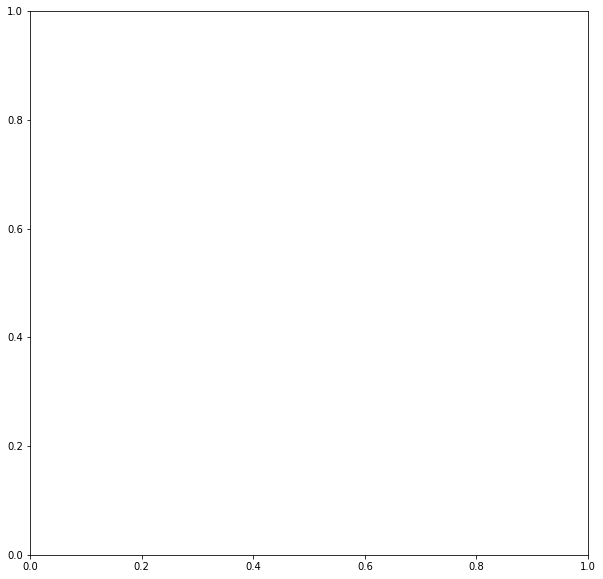

In [701]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

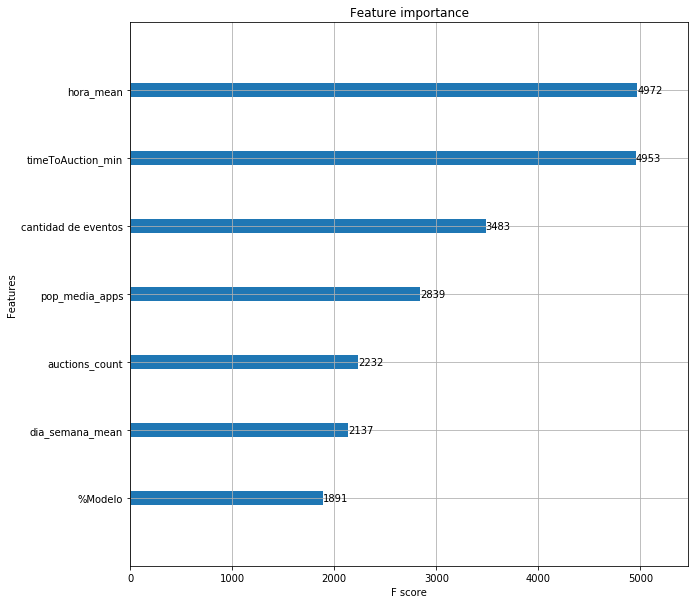

In [702]:

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

# ventana 2 auctions

In [763]:
data=aut2

In [764]:
y= data['st']
X = data.drop(['ref_hash','st'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#XGB1 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#max_depth = 5, alpha = 10, n_estimators = 10)

XGB2 = xgb.XGBRegressor()
XGB2.fit(X_train,y_train)

preds = XGB2.predict(X_test)
#XGB1.fit(X, y)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
#scores = cross_val_score(XGB1 , X, y, scoring = "neg_mean_squared_error", cv=5)

#mse_scores = -scores
# paso de MSE a RMSE
#rmse_scores = np.sqrt(mse_scores)
#rmse_scores.mean()

RMSE: 28587.162940


# ventana 3 auctions

In [765]:
data=aut3

In [766]:
y= data['st']
X = data.drop(['ref_hash','st'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#XGB1 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#max_depth = 5, alpha = 10, n_estimators = 10)

XGB3 = xgb.XGBRegressor()
XGB3.fit(X_train,y_train)

preds = XGB3.predict(X_test)
#XGB1.fit(X, y)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
#scores = cross_val_score(XGB1 , X, y, scoring = "neg_mean_squared_error", cv=5)

#mse_scores = -scores
# paso de MSE a RMSE
#rmse_scores = np.sqrt(mse_scores)
#rmse_scores.mean()

RMSE: 28180.560989


# ventana 4 auctions

In [767]:
data=aut4

In [768]:
y= data['st']
X = data.drop(['ref_hash','st'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#XGB1 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#max_depth = 5, alpha = 10, n_estimators = 10)

XGB4 = xgb.XGBRegressor()
XGB4.fit(X_train,y_train)

preds = XGB4.predict(X_test)
#XGB1.fit(X, y)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
#scores = cross_val_score(XGB1 , X, y, scoring = "neg_mean_squared_error", cv=5)

#mse_scores = -scores
# paso de MSE a RMSE
#rmse_scores = np.sqrt(mse_scores)
#rmse_scores.mean()

RMSE: 26983.499789


# ventana 5 auctions

In [769]:
data=aut5

In [770]:
y= data['st']
X = data.drop(['ref_hash','st'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#XGB1 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#max_depth = 5, alpha = 10, n_estimators = 10)

XGB5 = xgb.XGBRegressor()
XGB5.fit(X_train,y_train)

preds = XGB5.predict(X_test)
#XGB1.fit(X, y)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
#scores = cross_val_score(XGB1 , X, y, scoring = "neg_mean_squared_error", cv=5)

#mse_scores = -scores
# paso de MSE a RMSE
#rmse_scores = np.sqrt(mse_scores)
#rmse_scores.mean()

RMSE: 29034.456444


# ventana 6 auctions

In [771]:
data=aut6

In [772]:
y= data['st']
X = data.drop(['ref_hash','st'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#XGB1 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#max_depth = 5, alpha = 10, n_estimators = 10)

XGB6 = xgb.XGBRegressor()
XGB6.fit(X_train,y_train)

preds = XGB6.predict(X_test)
#XGB1.fit(X, y)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
#scores = cross_val_score(XGB1 , X, y, scoring = "neg_mean_squared_error", cv=5)

#mse_scores = -scores
# paso de MSE a RMSE
#rmse_scores = np.sqrt(mse_scores)
#rmse_scores.mean()

RMSE: 28103.226983


# Predicciones  auctions

In [773]:
data=target_aut

In [774]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 4771
Data columns (total 9 columns):
ref_hash               4037 non-null int64
auctions_count         4037 non-null float64
dia_semana_mean        4037 non-null float64
hora_mean              4037 non-null float64
cantidad de eventos    4037 non-null float64
timeToAuction_min      4037 non-null float64
pop_media_apps         4037 non-null float64
%Modelo                4037 non-null float64
st                     4037 non-null int64
dtypes: float64(7), int64(2)
memory usage: 315.4 KB


In [775]:
data.head()

,ref_hash,auctions_count,dia_semana_mean,hora_mean,cantidad de eventos,timeToAuction_min,pop_media_apps,%Modelo,st
0,1000169251625791246,13.0,4.538462,11.923077,2.0,76114.647428,372540.000000,0.750000,0
1,1000395625957344683,15.0,3.533333,15.733333,0.0,8034.974209,0.000000,0.591765,0
3,1003027494996471685,168.0,3.220238,8.952381,9.0,12171.691046,111596.111111,0.750000,0
4,1006670001679961544,3.0,4.333333,19.000000,0.0,64857.606340,0.000000,0.750000,0
5,1007573308966476713,7.0,3.571429,15.857143,0.0,18726.239096,0.000000,0.750000,0


In [776]:
data.columns

Index(['ref_hash', 'auctions_count', 'dia_semana_mean', 'hora_mean',
       'cantidad de eventos', 'timeToAuction_min', 'pop_media_apps', '%Modelo',
       'st'],
      dtype='object')

In [777]:

feature_final = data.drop(columns = ['ref_hash','st'])
feature_final.head()

,auctions_count,dia_semana_mean,hora_mean,cantidad de eventos,timeToAuction_min,pop_media_apps,%Modelo
0,13.0,4.538462,11.923077,2.0,76114.647428,372540.000000,0.750000
1,15.0,3.533333,15.733333,0.0,8034.974209,0.000000,0.591765
3,168.0,3.220238,8.952381,9.0,12171.691046,111596.111111,0.750000
4,3.0,4.333333,19.000000,0.0,64857.606340,0.000000,0.750000
5,7.0,3.571429,15.857143,0.0,18726.239096,0.000000,0.750000


In [604]:

#VC = VotingClassifier(estimators=[('xgb', XGB1), ('xgb', XGB2),('xgb', XGB3),('xgb', XGB4),('xgb', XGB5),('xgb', XGB6)], voting='soft', weights = [1,2,3,4,5,6])

In [778]:
#result1 = XGB1.predict(feature_final)
result2 = XGB2.predict(feature_final)
result3 = XGB3.predict(feature_final)
result4 = XGB4.predict(feature_final)
result5 = XGB5.predict(feature_final)
result6 = XGB6.predict(feature_final)

In [779]:
#hago un promedio ponderado
#result_ponderado=result1 *0.05 + result2 * 0.10 + result3* 0.15 + result4 *0.20 + result5*0.23 + result6 *0.27
#result_ponderado= result2 * 0.07 + result3* 0.13 + result4 *0.20 + result5*0.25 + result6 *0.35
result_ponderado= result2 * 0.2+ result3* 0.2 + result4 *0.2 + result5*0.2 + result6 *0.2

In [780]:
target1 =data.drop(['auctions_count', 'dia_semana_mean', 'hora_mean','cantidad de eventos','timeToAuction_min','pop_media_apps','%Modelo','st'], axis=1)
target1.head()

,ref_hash
0,1000169251625791246
1,1000395625957344683
3,1003027494996471685
4,1006670001679961544
5,1007573308966476713


In [781]:
target1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 4771
Data columns (total 1 columns):
ref_hash    4037 non-null int64
dtypes: int64(1)
memory usage: 63.1 KB


In [782]:
submit = []
for l in result_ponderado:
    submit.append(l)
target1['obj'] = submit

In [783]:
target1.head()


,ref_hash,obj
0,1000169251625791246,89993.890625
1,1000395625957344683,102323.250000
3,1003027494996471685,71915.585938
4,1006670001679961544,169471.093750
5,1007573308966476713,119022.656250


In [784]:
target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 8072
Data columns (total 2 columns):
ref_hash    4037 non-null int64
obj         4037 non-null int64
dtypes: int64(2)
memory usage: 94.6 KB


In [785]:

target1['ref_hash'] =  target1['ref_hash'].astype(str) +'_st'
target1.head()

,ref_hash,obj
0,1000169251625791246_st,89993.890625
1,1000395625957344683_st,102323.250000
3,1003027494996471685_st,71915.585938
4,1006670001679961544_st,169471.093750
5,1007573308966476713_st,119022.656250


In [786]:
target1['ref_hash'].size

4037

#  Corro los modelos installs

# ventana 1 installs

In [787]:
data=inst1

In [788]:
y= data['st']
X = data.drop(['ref_hash', 'sc'], axis=1)

XGB1 = xgb.XGBRegressor()
XGB1.fit(X, y)

scores = cross_val_score(XGB1 , X, y, scoring = "neg_mean_squared_error", cv=5)

mse_scores = -scores
# paso de MSE a RMSE
rmse_scores = np.sqrt(mse_scores)
rmse_scores.mean()

KeyError: 'st'

# ventana 2 installs

In [789]:
data=inst2

In [790]:
y= data['sc']
X = data.drop(['ref_hash','sc'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#XGB1 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#max_depth = 5, alpha = 10, n_estimators = 10)

XGB2 = xgb.XGBRegressor()
XGB2.fit(X_train,y_train)

preds = XGB2.predict(X_test)
#XGB1.fit(X, y)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
#scores = cross_val_score(XGB1 , X, y, scoring = "neg_mean_squared_error", cv=5)

#mse_scores = -scores
# paso de MSE a RMSE
#rmse_scores = np.sqrt(mse_scores)
#rmse_scores.mean()

RMSE: 6402.669227


# ventana 3 installs

In [791]:
data=inst3

In [792]:
y= data['sc']
X = data.drop(['ref_hash','sc'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#XGB1 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#max_depth = 5, alpha = 10, n_estimators = 10)

XGB3 = xgb.XGBRegressor()
XGB3.fit(X_train,y_train)

preds = XGB3.predict(X_test)
#XGB1.fit(X, y)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
#scores = cross_val_score(XGB1 , X, y, scoring = "neg_mean_squared_error", cv=5)

#mse_scores = -scores
# paso de MSE a RMSE
#rmse_scores = np.sqrt(mse_scores)
#rmse_scores.mean()

RMSE: 5111.338511


# ventana 4 installs

In [793]:
data=inst4

In [794]:
y= data['sc']
X = data.drop(['ref_hash','sc'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#XGB1 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#max_depth = 5, alpha = 10, n_estimators = 10)

XGB4 = xgb.XGBRegressor()
XGB4.fit(X_train,y_train)

preds = XGB4.predict(X_test)
#XGB1.fit(X, y)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
#scores = cross_val_score(XGB1 , X, y, scoring = "neg_mean_squared_error", cv=5)

#mse_scores = -scores
# paso de MSE a RMSE
#rmse_scores = np.sqrt(mse_scores)
#rmse_scores.mean()

RMSE: 5018.290780


# ventana 5 installs

In [795]:
data=inst5

In [796]:
y= data['sc']
X = data.drop(['ref_hash','sc'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#XGB1 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#max_depth = 5, alpha = 10, n_estimators = 10)

XGB5 = xgb.XGBRegressor()
XGB5.fit(X_train,y_train)

preds = XGB5.predict(X_test)
#XGB1.fit(X, y)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
#scores = cross_val_score(XGB1 , X, y, scoring = "neg_mean_squared_error", cv=5)

#mse_scores = -scores
# paso de MSE a RMSE
#rmse_scores = np.sqrt(mse_scores)
#rmse_scores.mean()

RMSE: 6596.370841


# ventana 6 installs

In [797]:
data=inst6

In [798]:
y= data['sc']
X = data.drop(['ref_hash','sc'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#XGB1 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#max_depth = 5, alpha = 10, n_estimators = 10)

XGB6 = xgb.XGBRegressor()
XGB6.fit(X_train,y_train)

preds = XGB6.predict(X_test)
#XGB1.fit(X, y)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
#scores = cross_val_score(XGB1 , X, y, scoring = "neg_mean_squared_error", cv=5)

#mse_scores = -scores
# paso de MSE a RMSE
#rmse_scores = np.sqrt(mse_scores)
#rmse_scores.mean()

RMSE: 8233.633193


# Predicciones  installs

In [799]:
data=target_inst
data.head()

,ref_hash,installs_count,dia_semana_mean,hora_mean,cantidad de eventos,timeToConversion_min,pop_media_apps,%Modelo,sc
0,1000169251625791246,0.0,0.0,0.0,2.0,259200.0,372540.000000,0.750000,0
1,1000395625957344683,0.0,0.0,0.0,0.0,259200.0,0.000000,0.591765,0
3,1003027494996471685,0.0,0.0,0.0,9.0,259200.0,111596.111111,0.750000,0
4,1006670001679961544,0.0,0.0,0.0,0.0,259200.0,0.000000,0.750000,0
5,1007573308966476713,0.0,0.0,0.0,0.0,259200.0,0.000000,0.750000,0


In [800]:
target2 =data.drop(['installs_count', 'dia_semana_mean', 'hora_mean','cantidad de eventos','timeToConversion_min','pop_media_apps','%Modelo','sc'], axis=1)
target2.head()

,ref_hash
0,1000169251625791246
1,1000395625957344683
3,1003027494996471685
4,1006670001679961544
5,1007573308966476713


In [801]:
feature_final2 = data.drop(columns = ['ref_hash','sc'])
feature_final2.head()

,installs_count,dia_semana_mean,hora_mean,cantidad de eventos,timeToConversion_min,pop_media_apps,%Modelo
0,0.0,0.0,0.0,2.0,259200.0,372540.000000,0.750000
1,0.0,0.0,0.0,0.0,259200.0,0.000000,0.591765
3,0.0,0.0,0.0,9.0,259200.0,111596.111111,0.750000
4,0.0,0.0,0.0,0.0,259200.0,0.000000,0.750000
5,0.0,0.0,0.0,0.0,259200.0,0.000000,0.750000


In [802]:
#result1 = XGB1.predict(feature_final2)
result2 = XGB2.predict(feature_final2)
result3 = XGB3.predict(feature_final2)
result4 = XGB4.predict(feature_final2)
result5 = XGB5.predict(feature_final2)
result6 = XGB6.predict(feature_final2)

In [803]:
#hago un promedio ponderado
#result_ponderado2=result1 *0.05 + result2 * 0.10 + result3* 0.15 + result4 *0.20 + result5*0.23 + result6 *0.27
#result_ponderado2= result2 * 0.07 + result3* 0.13 + result4 *0.20 + result5*0.25 + result6 *0.35
result_ponderado2= result2 * 0.2 + result3* 0.2 + result4 *0.2 + result5*0.2 + result6 *0.2
#result_ponderado2=result1 *0.03 + result2 * 0.07 + result3* 0.10 + result4 *0.20 + result5*0.25 + result6 *0.35

In [804]:
submit = []
for l in result_ponderado2:
    submit.append(l)
target2['obj'] = submit

In [805]:

target2['ref_hash'] =  target2['ref_hash'].astype(str) +'_sc'
target2.head()

,ref_hash,obj
0,1000169251625791246_sc,258163.359375
1,1000395625957344683_sc,258727.828125
3,1003027494996471685_sc,258538.812500
4,1006670001679961544_sc,258727.828125
5,1007573308966476713_sc,258727.828125


In [806]:
target2['ref_hash'].size

4037

In [807]:

target2.head()

,ref_hash,obj
0,1000169251625791246_sc,258163.359375
1,1000395625957344683_sc,258727.828125
3,1003027494996471685_sc,258538.812500
4,1006670001679961544_sc,258727.828125
5,1007573308966476713_sc,258727.828125


In [808]:
target1.head()

,ref_hash,obj
0,1000169251625791246_st,89993.890625
1,1000395625957344683_st,102323.250000
3,1003027494996471685_st,71915.585938
4,1006670001679961544_st,169471.093750
5,1007573308966476713_st,119022.656250


In [809]:
#target_final=target1.merge(target2, on='ref_hash',how='outer')
target_final=pd.concat([target1, target2], join="inner")
target_final.head(10)


,ref_hash,obj
0,1000169251625791246_st,89993.890625
1,1000395625957344683_st,102323.250000
3,1003027494996471685_st,71915.585938
4,1006670001679961544_st,169471.093750
5,1007573308966476713_st,119022.656250
6,1010070503877148763_st,255596.859375
7,1010265377387765028_st,257022.218750
8,1010531372912327058_st,127738.085938
9,1011610998357271358_st,100135.546875
10,1013543838965040946_st,88503.726562


In [810]:
target_final.ref_hash.size

8074

In [811]:
target_final.to_csv(path_or_buf = 'submit_final_5.csv', index = False)